In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
songs = pd.read_csv('songs.csv', encoding='latin-1')

# Dataset exploration

In [3]:
songs

,year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
0,2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,...,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
1,2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,...,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2,2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,...,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
3,2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,...,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,...,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,1990,She's Gone,Y&T,SOSIEQB12A6D4FC59D,ARGQANQ11F50C4769E,4,1.000,-10.197,93.140,0.859,...,38.120,-66.638,50.105,-40.692,43.763,-59.707,49.414,-53.970,68.303,0
7570,1990,Let It Out,Y&T,SOIGIQI12A6D4FC59E,ARGQANQ11F50C4769E,4,1.000,-12.392,79.858,0.196,...,83.454,-83.707,44.124,-51.628,69.929,-97.153,36.745,-61.243,56.902,0
7571,1990,Ten Lovers,Y&T,SOLNEQO12A6D4FC59F,ARGQANQ11F50C4769E,4,0.984,-10.304,91.760,0.592,...,103.413,-101.464,36.152,-45.387,48.352,-57.103,67.641,-53.729,65.176,0
7572,1990,Goin' Off The Deep End,Y&T,SOEMJEP12A58A7E7B5,ARGQANQ11F50C4769E,4,0.907,-9.295,110.907,0.838,...,108.688,-55.893,42.222,-76.631,68.336,-83.284,56.476,-51.687,59.427,0


### Checking for missing values

In [7]:
songs.isna().sum()

year                        0
songtitle                   0
artistname                  0
songID                      0
artistID                    0
timesignature               0
timesignature_confidence    0
loudness                    0
tempo                       0
tempo_confidence            0
key                         0
key_confidence              0
energy                      0
pitch                       0
timbre_0_min                0
timbre_0_max                0
timbre_1_min                0
timbre_1_max                0
timbre_2_min                0
timbre_2_max                0
timbre_3_min                0
timbre_3_max                0
timbre_4_min                0
timbre_4_max                0
timbre_5_min                0
timbre_5_max                0
timbre_6_min                0
timbre_6_max                0
timbre_7_min                0
timbre_7_max                0
timbre_8_min                0
timbre_8_max                0
timbre_9_min                0
timbre_9_m

### Looking at the datatypes & non_null count

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7574 entries, 0 to 7573
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      7574 non-null   int64  
 1   songtitle                 7574 non-null   object 
 2   artistname                7574 non-null   object 
 3   songID                    7574 non-null   object 
 4   artistID                  7574 non-null   object 
 5   timesignature             7574 non-null   int64  
 6   timesignature_confidence  7574 non-null   float64
 7   loudness                  7574 non-null   float64
 8   tempo                     7574 non-null   float64
 9   tempo_confidence          7574 non-null   float64
 10  key                       7574 non-null   int64  
 11  key_confidence            7574 non-null   float64
 12  energy                    7574 non-null   float64
 13  pitch                     7574 non-null   float64
 14  timbre_0

In [9]:
songs.columns

Index(['year', 'songtitle', 'artistname', 'songID', 'artistID',
       'timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

In [10]:
songs.artistname.nunique()

1032

In [11]:
songs.loc[1]

year                                      2010
songtitle                      Sticks & Bricks
artistname                   A Day to Remember
songID                      SOPAQHU1315CD47F31
artistID                    AROBSHL1187B9AFB01
timesignature                                4
timesignature_confidence                     1
loudness                                -4.051
tempo                                  140.048
tempo_confidence                         0.921
key                                         10
key_confidence                           0.469
energy                                 0.98471
pitch                                    0.025
timbre_0_min                                 0
timbre_0_max                            57.414
timbre_1_min                           -37.351
timbre_1_max                            171.13
timbre_2_min                          -149.589
timbre_2_max                           180.334
timbre_3_min                          -380.143
timbre_3_max 

## Data Exploration

In [12]:
songs.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,...,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000,7574.000000
mean,2001.455902,3.893979,0.853307,-8.817262,107.348267,0.622866,5.384605,0.433843,0.675471,0.010817,...,95.653221,-63.703984,50.057489,-59.515016,68.028067,-87.340055,55.520722,-50.868457,47.490774,0.147742
std,5.815223,0.532561,0.243748,4.377079,24.665030,0.304656,3.572579,0.273826,0.243473,0.013671,...,26.859726,15.970244,14.463524,17.190527,20.381321,30.464274,23.549473,11.701530,12.463966,0.354868
min,1990.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000000,...,15.699000,-158.756000,-25.955000,-149.507000,8.415000,-208.819000,-6.359000,-145.599000,7.200000,0.000000
25%,1997.000000,4.000000,0.819250,-10.847000,88.860250,0.372000,2.000000,0.204000,0.500138,0.003000,...,76.498000,-73.050750,40.584500,-70.282500,53.037250,-105.130250,39.196000,-58.058000,38.975250,0.000000
50%,2002.000000,4.000000,0.979000,-7.649000,103.268000,0.701500,6.000000,0.451500,0.718160,0.007000,...,94.632500,-62.661500,49.220000,-58.650000,65.935000,-83.074000,50.895000,-50.892500,46.437500,0.000000
75%,2006.000000,4.000000,1.000000,-5.640000,124.800500,0.892000,9.000000,0.646000,0.887396,0.014000,...,112.708250,-52.982750,58.462000,-47.699750,81.267000,-64.518000,66.593000,-43.292250,55.030250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,244.307000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-2.382000,144.985000,1.140000,161.518000,-10.640000,192.417000,-6.497000,110.272000,1.000000


#### Looking at the content of the row with the minimum value for "Time Signature" :

In [13]:
songs.loc[songs.timesignature.min()]

year                                                      2010
songtitle                   This Is the House That Doubt Built
artistname                                   A Day to Remember
songID                                      SOBGGAB12C5664F054
artistID                                    AROBSHL1187B9AFB01
timesignature                                                3
timesignature_confidence                                 0.853
loudness                                                -4.262
tempo                                                   91.525
tempo_confidence                                         0.953
key                                                         11
key_confidence                                           0.453
energy                                                0.966656
pitch                                                    0.024
timbre_0_min                                             0.002
timbre_0_max                                           

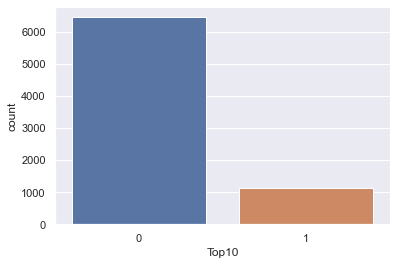

In [5]:
#Repartition of our main interest here : Top10 column & repartition between the 2 possible values :
sns.countplot(songs.Top10)

In [4]:
#Out of curiosity... what are the Top 10 artist represented in the dataset ? 
songs.artistname.value_counts().head(10)

Various artists    162
Anal Cunt           49
Various Artists     44
Tori Amos           41
Napalm Death        37
Eels                37
Rancid              31
The Residents       31
Faith Hill          29
LL Cool J           29
Name: artistname, dtype: int64

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

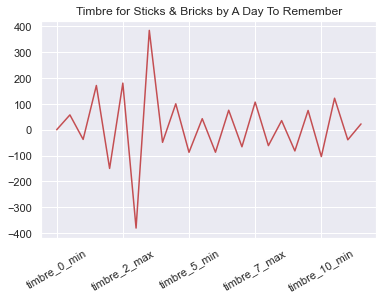

In [16]:
#How timbre looks like plotted : 
songs.loc[1,'timbre_0_min' : 'timbre_11_max'].plot(color = 'r')
plt.title('Timbre for Sticks & Bricks by A Day To Remember')
plt.xticks(rotation=30)

In [367]:
songs.loc[(songs.year == 2005) & (songs.Top10 == 1)]['artistname'].value_counts()

Kelly Clarkson                  4
50 Cent                         3
Green Day                       2
The Game                        2
Bow Wow                         2
Mariah Carey                    2
Gwen Stefani                    2
Destiny's Child                 2
Akon                            1
Mario                           1
The Pussycat Dolls              1
Young Jeezy                     1
Fort Minor                      1
Madonna                         1
Weezer                          1
T.I.                            1
Nelly                           1
Coldplay                        1
Bo Bice                         1
Missy Elliott                   1
Bobby Valentino                 1
D.H.T.                          1
Snoop Dogg                      1
T-Pain                          1
Rob Thomas                      1
Ciara                           1
Will Smith                      1
Ja Rule                         1
Carrie Underwood                1
Pretty Ricky  

### Checking some distributions

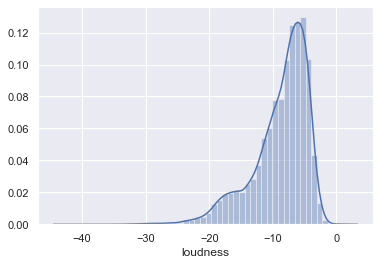

In [18]:
sns.distplot(songs.loudness)

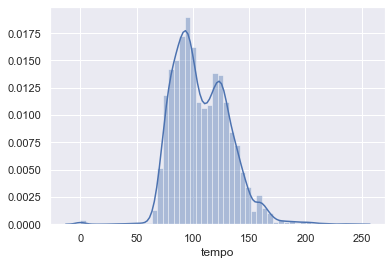

In [94]:
sns.distplot(songs.tempo)

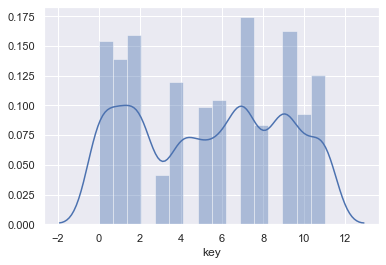

In [100]:
sns.distplot(songs.key)

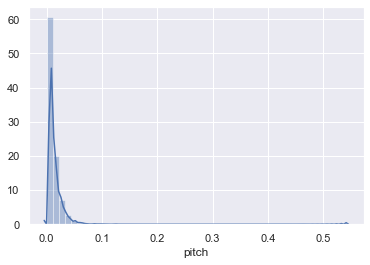

In [102]:
sns.distplot(songs.pitch)

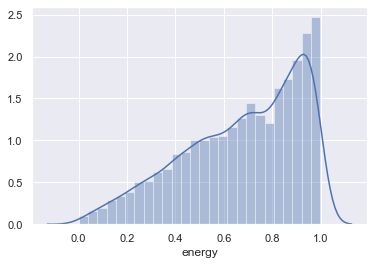

In [103]:
sns.distplot(songs.energy)

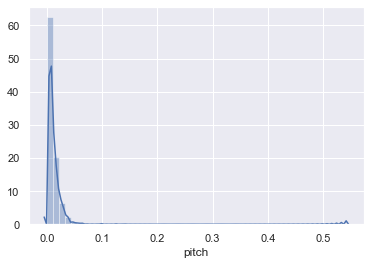

In [393]:
sns.distplot(df_songs.pitch)

## Preprocess Data for Model
- Removing columns having object type (Name of Artist, IDs, Song titles) 
- Selectionning the last 5 years
- Removing the confidences columns
- Evaluation of collinearity
- Split of the data

In [125]:
df_songs = songs.loc[songs.year >= 2005]

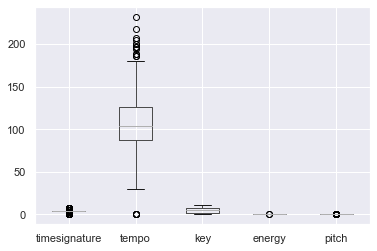

In [126]:
#Checking for outliers
df_songs.boxplot(column = ['timesignature', 'tempo', 'key', 'energy', 'pitch'])

In [127]:
df_songs.describe()

,year,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2007.447540,3.891823,0.862358,-7.695249,107.667509,0.613857,5.282923,0.429056,0.701008,0.010013,...,97.734668,-63.410612,49.927515,-60.536997,69.422452,-89.848010,55.272458,-51.124300,46.506391,0.128437
std,1.613976,0.543662,0.233225,4.154686,25.139873,0.305452,3.584599,0.269668,0.231839,0.014464,...,26.690665,15.650748,13.970115,17.193114,20.438494,30.425094,24.178167,11.056917,11.921179,0.334636
min,2005.000000,0.000000,0.000000,-42.451000,0.000000,0.000000,0.000000,0.000000,0.000095,0.000000,...,27.291000,-158.756000,-25.955000,-139.172000,14.192000,-202.256000,-6.359000,-121.731000,13.607000,0.000000
25%,2006.000000,4.000000,0.836000,-9.096750,87.274500,0.353000,2.000000,0.206750,0.541281,0.003000,...,79.247000,-71.970250,40.460750,-71.014500,54.278250,-107.846000,38.650500,-58.005500,38.539500,0.000000
50%,2007.000000,4.000000,0.979000,-6.478000,104.020000,0.687000,5.000000,0.448500,0.744224,0.007000,...,96.985000,-62.422500,48.934500,-59.749500,67.895500,-85.716500,50.506000,-51.219000,45.406500,0.000000
75%,2009.000000,4.000000,1.000000,-4.876000,125.988250,0.890250,8.000000,0.636000,0.899557,0.013000,...,114.451000,-53.078500,57.791250,-48.745250,82.605500,-67.442250,66.228500,-43.941750,53.448250,0.000000
max,2010.000000,7.000000,1.000000,1.305000,232.134000,1.000000,11.000000,1.000000,0.998492,0.541000,...,214.819000,-18.601000,141.449000,1.140000,159.600000,-18.905000,192.417000,-8.006000,107.282000,1.000000


In [128]:
df_songs.columns

Index(['year', 'songtitle', 'artistname', 'songID', 'artistID',
       'timesignature', 'timesignature_confidence', 'loudness', 'tempo',
       'tempo_confidence', 'key', 'key_confidence', 'energy', 'pitch',
       'timbre_0_min', 'timbre_0_max', 'timbre_1_min', 'timbre_1_max',
       'timbre_2_min', 'timbre_2_max', 'timbre_3_min', 'timbre_3_max',
       'timbre_4_min', 'timbre_4_max', 'timbre_5_min', 'timbre_5_max',
       'timbre_6_min', 'timbre_6_max', 'timbre_7_min', 'timbre_7_max',
       'timbre_8_min', 'timbre_8_max', 'timbre_9_min', 'timbre_9_max',
       'timbre_10_min', 'timbre_10_max', 'timbre_11_min', 'timbre_11_max',
       'Top10'],
      dtype='object')

In [10]:
#We remove the columns we're not interesting in, which doesn't give useful informations for the model
columns_to_remove = ['year', 'songtitle', 'artistname', 'songID', 'artistID', 'timesignature_confidence', 'tempo_confidence',
                    'key_confidence']
df_songs.drop(columns_to_remove, axis = 1, inplace=True)

NameError: name 'df_songs' is not defined

### Let's look at the correlations

In [24]:
df_songs.corr()

,timesignature,loudness,tempo,key,energy,pitch,timbre_0_min,timbre_0_max,timbre_1_min,timbre_1_max,...,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
timesignature,1.000000,0.113368,0.072325,0.029082,0.128271,-0.092110,0.007564,0.111233,-0.000516,0.027645,...,0.021773,-0.038842,-0.033356,-0.006702,0.035520,-0.013300,0.013351,-0.098116,-0.009965,0.042578
loudness,0.113368,1.000000,0.050673,-0.020263,0.766804,0.010349,-0.041830,0.918058,0.290533,0.040337,...,-0.034198,0.075041,-0.128819,0.130225,-0.051641,-0.166510,0.092458,-0.035145,-0.172367,-0.146339
tempo,0.072325,0.050673,1.000000,-0.000652,0.164904,0.006795,0.002524,0.013543,0.055854,-0.044230,...,-0.077419,0.092831,0.006239,0.068265,-0.025701,0.005357,-0.017003,0.006146,-0.029061,-0.013175
key,0.029082,-0.020263,-0.000652,1.000000,-0.004327,0.001564,-0.024558,-0.022365,-0.015301,0.010715,...,0.011960,-0.021500,-0.007077,-0.027417,0.010806,0.030227,0.026046,0.007071,0.019344,0.036678
energy,0.128271,0.766804,0.164904,-0.004327,1.000000,0.216797,0.064989,0.598343,0.481349,-0.011143,...,-0.199357,0.188947,-0.212434,0.325204,-0.142070,-0.078874,0.027291,0.029872,-0.251996,-0.116714
pitch,-0.092110,0.010349,0.006795,0.001564,0.216797,1.000000,0.024993,-0.120262,0.311117,-0.093715,...,-0.166791,0.200974,-0.247345,0.253157,-0.196867,0.057935,-0.087150,0.201732,-0.183772,-0.115194
timbre_0_min,0.007564,-0.041830,0.002524,-0.024558,0.064989,0.024993,1.000000,-0.109865,0.143054,-0.050483,...,-0.086934,0.062502,0.003492,0.089055,0.056880,-0.019769,-0.029331,-0.010532,-0.047785,0.193476
timbre_0_max,0.111233,0.918058,0.013543,-0.022365,0.598343,-0.120262,-0.109865,1.000000,0.119836,0.034129,...,-0.016033,0.016021,-0.099391,0.056089,-0.077255,-0.129977,0.060999,-0.020153,-0.101008,-0.203644
timbre_1_min,-0.000516,0.290533,0.055854,-0.015301,0.481349,0.311117,0.143054,0.119836,1.000000,0.046780,...,-0.285300,0.229677,-0.230310,0.432101,-0.146556,-0.061679,-0.028045,0.070929,-0.219309,0.029317
timbre_1_max,0.027645,0.040337,-0.044230,0.010715,-0.011143,-0.093715,-0.050483,0.034129,0.046780,1.000000,...,0.197941,-0.312627,0.176279,-0.217678,0.325141,-0.206753,0.138720,-0.199106,0.184254,0.112975


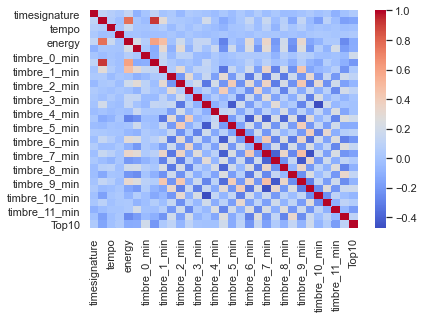

In [25]:
sns.heatmap(df_songs.corr(), cmap='coolwarm')

In [11]:
##Loudness seems to be highly correlated with energy, we get rid of it
df_songs.drop('loudness', axis=1, inplace = True)

NameError: name 'df_songs' is not defined

### Just some more data exploration on our data subset...

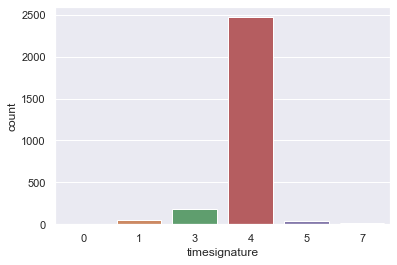

In [27]:
sns.countplot(df_songs.timesignature)

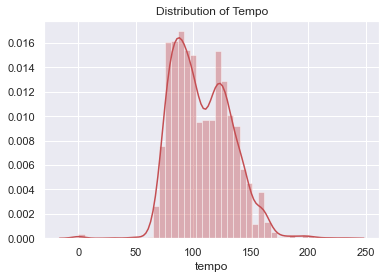

In [378]:
plt.title('Distribution of Tempo')
sns.distplot(df_songs.tempo, color = 'r')

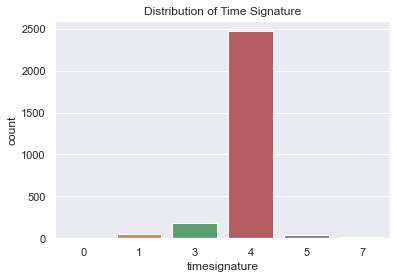

In [28]:
plt.title('Distribution of Time Signature')
sns.countplot(df_songs.timesignature)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

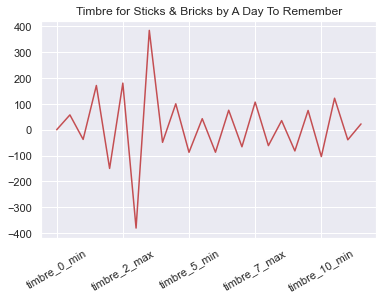

In [30]:
#How timbre looks like plotted : 
df_songs.loc[1,'timbre_0_min' : 'timbre_11_max'].plot(color = 'r')
plt.title('Timbre for Sticks & Bricks by A Day To Remember')
plt.xticks(rotation=30)

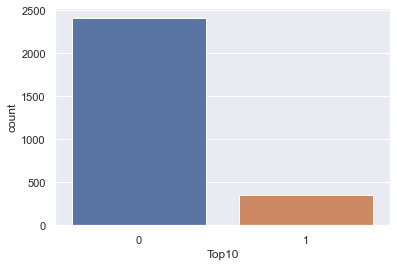

In [29]:
sns.countplot(df_songs.Top10)

In [31]:
df_songs.Top10.value_counts()

0    2409
1     355
Name: Top10, dtype: int64

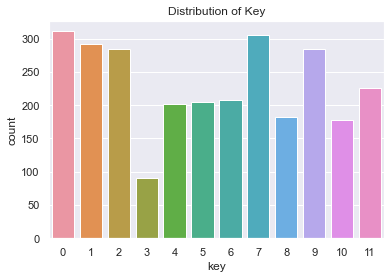

In [32]:
plt.title('Distribution of Key')
sns.countplot(df_songs.key)

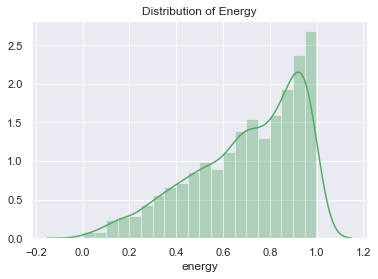

In [33]:
plt.title('Distribution of Energy')
sns.distplot(df_songs.energy, color = 'g')

In [12]:
## What are the correlations with our predicted variable (Top10) ?
df_songs.drop('Top10', axis=1).corrwith(df_songs.Top10).plot.bar(figsize = (15, 10), title = "Correlation with Top10", fontsize = 10,grid = True, color=np.random.random(3) )

NameError: name 'df_songs' is not defined

## Model

## Splitting the data for training & testing

In [226]:
#Checking for imbalanced data : 
df_songs.Top10.value_counts(normalize = True)

0    0.871563
1    0.128437
Name: Top10, dtype: float64

In [132]:
#Splitting the dataset : 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_songs.drop('Top10', axis=1), df_songs.Top10, test_size = 0.20, random_state = 42, stratify = df_songs.Top10)

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
pred1 = model1.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[425,  57],
       [ 42,  29]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred1)

0.8209764918625678

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [45]:
confusion_matrix(y_test, pred2)

array([[425,  57],
       [ 46,  25]], dtype=int64)

In [46]:
accuracy_score(y_test, pred2)

0.8137432188065099

## Logistic Regression 

In [154]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression(max_iter=10000, class_weight='balance')
model3.fit(X_train,y_train)
pred3 = model3.predict(X_test)

In [155]:
confusion_matrix(y_test, pred3)

array([[476,   6],
       [ 56,  15]], dtype=int64)

In [156]:
accuracy_score(y_test, pred3)

0.8878842676311031

### Trying with feature selection

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [133]:
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
X_test.columns[rfe.support_]

Index(['timesignature', 'tempo', 'key', 'energy', 'pitch', 'timbre_0_min',
       'timbre_0_max', 'timbre_1_min', 'timbre_1_max', 'timbre_2_min',
       'timbre_2_max', 'timbre_3_min', 'timbre_3_max', 'timbre_4_min',
       'timbre_4_max', 'timbre_5_min', 'timbre_5_max', 'timbre_6_min',
       'timbre_6_max', 'timbre_7_min', 'timbre_7_max', 'timbre_8_min',
       'timbre_8_max', 'timbre_9_min', 'timbre_9_max', 'timbre_10_min',
       'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')
[ True False  True  True  True  True  True False False False False False
 False  True  True False False  True  True  True  True False False False
  True False False  True False]
[ 1 13  1  1  1  1  1  4  9 15 11 10  6  1  1  3 14  1  1  1  1  8  7 12
  1  5 16  1  2]


In [52]:
pred9 = rfe.predict(X_test)

In [53]:
confusion_matrix(y_test, pred9)

array([[479,   3],
       [ 65,   6]], dtype=int64)

In [54]:
accuracy_score(y_test, pred9)

0.8770343580470162

## With class weight balanced

In [56]:
from sklearn.linear_model import LogisticRegression
model11 = LogisticRegression(max_iter=10000, class_weight='balanced')
model11.fit(X_train,y_train)
pred11 = model11.predict(X_test)

In [57]:
confusion_matrix(y_test, pred11)

array([[359, 123],
       [ 13,  58]], dtype=int64)

In [58]:
accuracy_score(y_test, pred11)

0.7540687160940326

## AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [153]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [61]:
confusion_matrix(y_test, pred4)

array([[469,  13],
       [ 49,  22]], dtype=int64)

In [62]:
accuracy_score(y_test, pred4)

0.8878842676311031

### Trying with feature selection

In [63]:
adaboost = AdaBoostClassifier()
rfe = RFE(adaboost)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True  True  True  True  True False  True False
  True False  True  True False  True False False  True False False False
 False False False  True False]
[16  1 14  1  1  1  1  1  1  8  1  5  1 11  1  1 13  1  3  4  1  9 10  6
  7  2 12  1 15]
Index(['timesignature', 'tempo', 'key', 'energy', 'pitch', 'timbre_0_min',
       'timbre_0_max', 'timbre_1_min', 'timbre_1_max', 'timbre_2_min',
       'timbre_2_max', 'timbre_3_min', 'timbre_3_max', 'timbre_4_min',
       'timbre_4_max', 'timbre_5_min', 'timbre_5_max', 'timbre_6_min',
       'timbre_6_max', 'timbre_7_min', 'timbre_7_max', 'timbre_8_min',
       'timbre_8_max', 'timbre_9_min', 'timbre_9_max', 'timbre_10_min',
       'timbre_10_max', 'timbre_11_min', 'timbre_11_max'],
      dtype='object')


In [67]:
X_test.columns[rfe.support_]

Index(['tempo', 'energy', 'pitch', 'timbre_0_min', 'timbre_0_max',
       'timbre_1_min', 'timbre_1_max', 'timbre_2_max', 'timbre_3_max',
       'timbre_4_max', 'timbre_5_min', 'timbre_6_min', 'timbre_7_max',
       'timbre_11_min'],
      dtype='object')

In [64]:
pred10 = rfe.predict(X_test)

In [65]:
confusion_matrix(y_test, pred10)

array([[465,  17],
       [ 51,  20]], dtype=int64)

In [66]:
accuracy_score(y_test, pred10)

0.8770343580470162

## Gaussian Naive Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)

In [70]:
confusion_matrix(y_test, pred5)

array([[388,  94],
       [ 19,  52]], dtype=int64)

In [71]:
accuracy_score(y_test, pred5)

0.7956600361663653

## Support Vector Machine

### NuSVC

In [72]:
from sklearn.svm import NuSVC

In [73]:
model6 = NuSVC(nu=0.2)
model6.fit(X_train, y_train)
pred6 = model6.predict(X_test)

In [74]:
confusion_matrix(y_test, pred6)

array([[460,  22],
       [ 48,  23]], dtype=int64)

In [75]:
accuracy_score(y_test, pred6)

0.8734177215189873

## SVC

In [76]:
from sklearn.svm import SVC
model7 = SVC(probability=True)
model7.fit(X_train, y_train)
pred7 = model7.predict(X_test)

In [77]:
confusion_matrix(y_test, pred7)

array([[482,   0],
       [ 70,   1]], dtype=int64)

In [78]:
accuracy_score(y_test, pred7)

0.8734177215189873

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
model8 = KNeighborsClassifier(9)
model8.fit(X_train, y_train)
pred8 = model8.predict(X_test)

In [81]:
confusion_matrix(y_test, pred8)

array([[473,   9],
       [ 60,  11]], dtype=int64)

In [82]:
accuracy_score(y_test, pred8)

0.8752260397830018

## Evaluation of Model : ROC Curve

In [83]:
from sklearn.metrics import auc, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

### Logistic Regression

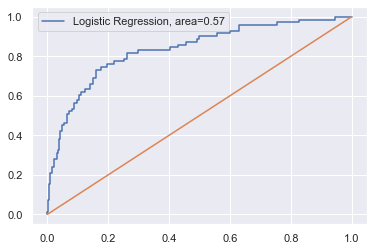

In [84]:
model_roc = roc_auc_score(y_test,pred3)
fpr, tpr,thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression, area={model_roc.round(2)}')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

### Logistic Regression with RFE

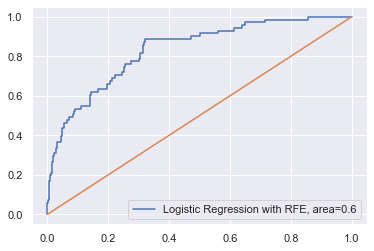

In [462]:
model_roc = roc_auc_score(y_test,pred9)
fpr, tpr,thresholds = roc_curve(y_test, rfe.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression with RFE, area={model_roc.round(2)}')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

### AdaBoost

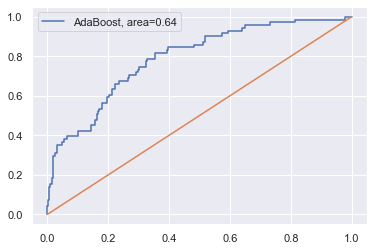

In [86]:
model_roc = roc_auc_score(y_test,pred4)
fpr, tpr,thresholds = roc_curve(y_test, model4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'AdaBoost, area={model_roc.round(2)}')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

### NuSVC

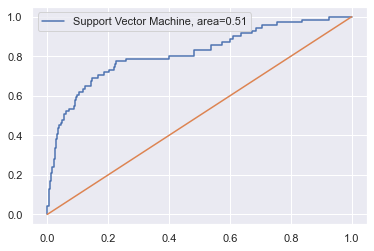

In [85]:
model_roc = roc_auc_score(y_test,pred7)
fpr, tpr,thresholds = roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Support Vector Machine, area={model_roc.round(2)}')
plt.plot([0,1],[0,1])
plt.legend()
plt.show()

## Calculating the metrics

In [92]:
from sklearn.metrics import classification_report

### Logistic Regression

In [91]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       482
           1       0.69      0.15      0.25        71

    accuracy                           0.88       553
   macro avg       0.79      0.57      0.59       553
weighted avg       0.86      0.88      0.85       553



### Logistic Regression with RFE

In [461]:
print(classification_report(y_test, pred9))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       482
           1       0.71      0.21      0.33        71

    accuracy                           0.89       553
   macro avg       0.80      0.60      0.63       553
weighted avg       0.87      0.89      0.86       553



### AdaBoost

In [428]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       482
           1       0.56      0.31      0.40        71

    accuracy                           0.88       553
   macro avg       0.73      0.64      0.67       553
weighted avg       0.86      0.88      0.87       553



### NuSVC

In [433]:
print(print(classification_report(y_test, pred6)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       482
           1       0.49      0.34      0.40        71

    accuracy                           0.87       553
   macro avg       0.70      0.64      0.66       553
weighted avg       0.85      0.87      0.86       553

None
